**Download Dataset**

In [1]:
!wget -P /content/sample_data https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip 

--2021-07-27 02:05:24--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/content/sample_data/rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  5.87MB/s    in 78s     

2021-07-27 02:06:42 (3.97 MB/s) - ‘/content/sample_data/rockpaperscissors.zip’ saved [322873683/322873683]



**Import Libraries and Prepare Dataset**

In [2]:
import zipfile, os, shutil
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

base_dir = '/content/sample_data/'
dataset_dir = base_dir + 'Dataset/'

dataset = base_dir + 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(dataset, 'r')
zip_ref.extractall(dataset_dir)
zip_ref.close()

**Split Training and Validation to 60%:40%**

In [4]:
def splitTrainingTesting(label):
  direktoriRawData = dataset_dir +'rockpaperscissors/'+ label

  training_data, validation_data = train_test_split(os.listdir(direktoriRawData), test_size = 0.40) # Testing nya 40% untuk setiap label

  training_data = list(map(lambda x: direktoriRawData +'/'+ x, training_data))
  validation_data = list(map(lambda x: direktoriRawData +'/'+ x, validation_data))
  labelTrain = [label] * len(training_data)
  labelValidation = [label] * len(validation_data)

  return training_data, validation_data, labelTrain, labelValidation

labels = ['scissors', 'rock', 'paper']
trainData, validationData, labelAll = [], [], [[],[]]

for i in labels:
  x = splitTrainingTesting(i)
  trainData += x[0]
  validationData += x[1]
  labelAll[0] += x[2]
  labelAll[1] += x[3]

trainData = pd.DataFrame({'Label': labelAll[0], 'Path File': trainData})
validationData = pd.DataFrame({'Label': labelAll[1], 'Path File': validationData})

print('TRAIN DATA :\n\n',trainData)
print('\nVALIDATION DATA : \n\n',validationData)

TRAIN DATA :

          Label                                          Path File
0     scissors  /content/sample_data/Dataset/rockpaperscissors...
1     scissors  /content/sample_data/Dataset/rockpaperscissors...
2     scissors  /content/sample_data/Dataset/rockpaperscissors...
3     scissors  /content/sample_data/Dataset/rockpaperscissors...
4     scissors  /content/sample_data/Dataset/rockpaperscissors...
...        ...                                                ...
1307     paper  /content/sample_data/Dataset/rockpaperscissors...
1308     paper  /content/sample_data/Dataset/rockpaperscissors...
1309     paper  /content/sample_data/Dataset/rockpaperscissors...
1310     paper  /content/sample_data/Dataset/rockpaperscissors...
1311     paper  /content/sample_data/Dataset/rockpaperscissors...

[1312 rows x 2 columns]

VALIDATION DATA : 

         Label                                          Path File
0    scissors  /content/sample_data/Dataset/rockpaperscissors...
1    scissors  /

**Image Augmentation and Image Generator**

In [5]:
augmentasi_Training = ImageDataGenerator(
    rotation_range=20,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
  )

augmentasi_Validation = ImageDataGenerator(
    rotation_range=20,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
  )

training_generator = augmentasi_Training.flow_from_dataframe(
    trainData,
    class_mode='categorical',
    x_col='Path File',
    y_col='Label',
    target_size=(100,150),
    batch_size=4
)

validation_generator = augmentasi_Validation.flow_from_dataframe(
    validationData,
    class_mode='categorical',
    x_col='Path File',
    y_col='Label',
    target_size=(100,150),
    batch_size=4
)

Found 1312 validated image filenames belonging to 3 classes.
Found 876 validated image filenames belonging to 3 classes.


**Create Sequential Model**

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.summary()

model.__name="Rock, Paper, Scissors Classification"
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']               
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 15, 256)        2

**Training model using Callback**

In [7]:
accuracy_threshold = 96e-2
class stoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nDi Epoch ke', epoch, '\nAkurasinya sudah mencapai %2.2f%%.' %(logs['accuracy']*100), 'Training diberhentikan.')
            self.model.stop_training = True

training = model.fit(
    training_generator,
    steps_per_epoch = 25,
    epochs = 75,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [stoppingCallback()]
)

Epoch 1/75
25/25 - 32s - loss: 1.1100 - accuracy: 0.4000 - val_loss: 1.0977 - val_accuracy: 0.3500
Epoch 2/75
25/25 - 1s - loss: 1.0993 - accuracy: 0.3300 - val_loss: 1.0976 - val_accuracy: 0.3000
Epoch 3/75
25/25 - 1s - loss: 1.0984 - accuracy: 0.3600 - val_loss: 1.0701 - val_accuracy: 0.6500
Epoch 4/75
25/25 - 1s - loss: 1.1013 - accuracy: 0.3700 - val_loss: 1.0947 - val_accuracy: 0.3000
Epoch 5/75
25/25 - 1s - loss: 1.0601 - accuracy: 0.4000 - val_loss: 1.1168 - val_accuracy: 0.2500
Epoch 6/75
25/25 - 1s - loss: 0.8543 - accuracy: 0.6400 - val_loss: 0.9987 - val_accuracy: 0.4500
Epoch 7/75
25/25 - 1s - loss: 0.8135 - accuracy: 0.6000 - val_loss: 0.4524 - val_accuracy: 0.8000
Epoch 8/75
25/25 - 1s - loss: 0.6843 - accuracy: 0.7900 - val_loss: 0.7384 - val_accuracy: 0.6500
Epoch 9/75
25/25 - 1s - loss: 0.5086 - accuracy: 0.7400 - val_loss: 0.5944 - val_accuracy: 0.8500
Epoch 10/75
25/25 - 1s - loss: 0.4167 - accuracy: 0.8900 - val_loss: 0.2910 - val_accuracy: 0.8500
Epoch 11/75
25/25 

**Predicting Image with the Created Model**

In [8]:
def prediksiGambar():
  fileUpload = files.upload()
  path_gambar = list(fileUpload.keys())[0]
  gambar = image.load_img(path_gambar, target_size = (100, 150))
  grafikGambar = plt.imshow(gambar)
  bitGambar = image.img_to_array(gambar)
  bitGambar = np.expand_dims(bitGambar, axis = 0)

  gambarAkhir = np.vstack([bitGambar])
  hasilPrediksi = model.predict(gambarAkhir, batch_size = 10)

  print('Berikut adalah gambar : ',end='')
  if hasilPrediksi[0, 0] == 1:
    print('Paper')
  elif hasilPrediksi[0, 1] == 1:
    print('Rock')
  elif hasilPrediksi[0, 2] == 1:
    print('Scissors')
  else:
    print('Bukan Gunting, Batu, maupun kertas.')

  os.remove(path_gambar)

Saving Gunting.png to Gunting.png
Berikut adalah gambar : Scissors


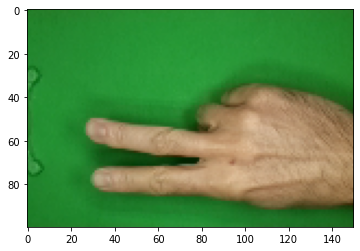

In [9]:
prediksiGambar()

Saving Batu.png to Batu.png
Berikut adalah gambar : Rock


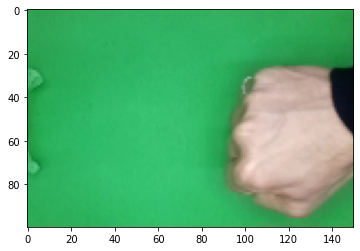

In [10]:
prediksiGambar()

Saving Kertas.png to Kertas.png
Berikut adalah gambar : Paper


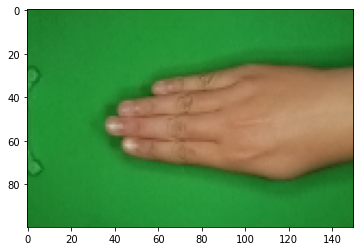

In [11]:
prediksiGambar()